In [1]:
import wfdb
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import numpy as np

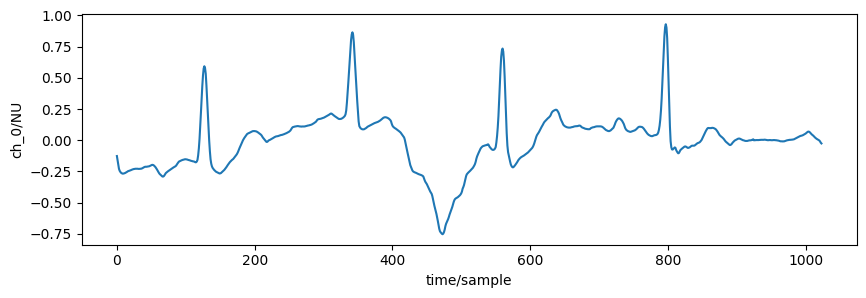

array([[-0.127],
       [-0.162],
       [-0.197],
       ...,
       [-0.018],
       [-0.022],
       [-0.021]])

In [24]:
df = pd.read_csv('REFERENCE-v3.csv', names=['filename', 'label'], header=None)
filename = df.loc[0, 'filename']
r = wfdb.rdrecord(f'./training2017/{filename}')
s = r.p_signal[:1024,0]
wfdb.plot_items(signal=s,
                figsize=(10, 3),)

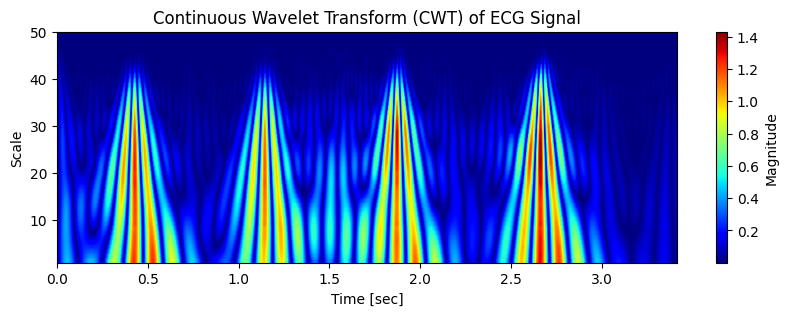

In [22]:
scales = np.arange(1, 51)
sampling_frequency = 300
coefs, freqs = pywt.cwt(s,
                        scales=scales,
                        wavelet='morl',
                        sampling_period=1.0 / sampling_frequency)

plt.figure(figsize=(10, 3))
plt.imshow(np.abs(coefs), extent=[0, len(s) / sampling_frequency, scales.min(), scales.max()],
           aspect='auto', cmap='jet')
plt.colorbar(label='Magnitude')
plt.ylabel('Scale')
plt.xlabel('Time [sec]')
plt.title('Continuous Wavelet Transform (CWT) of ECG Signal')
plt.show()

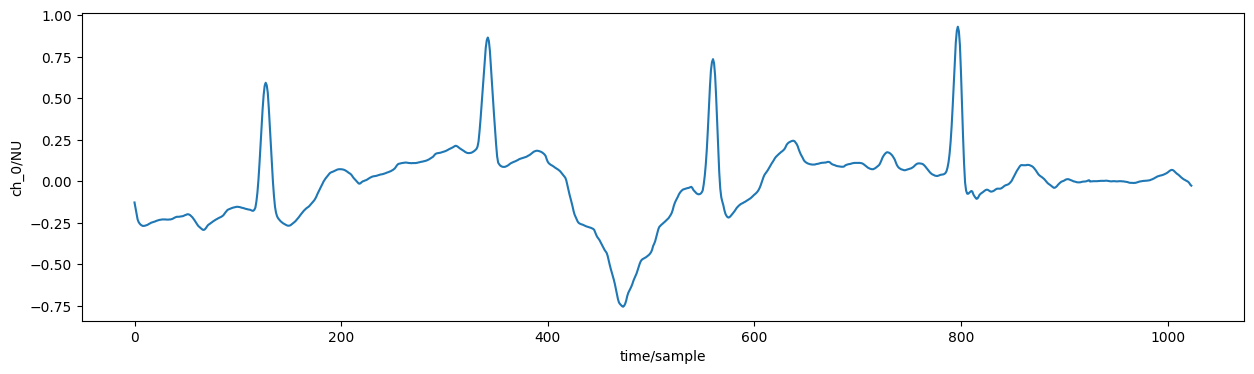

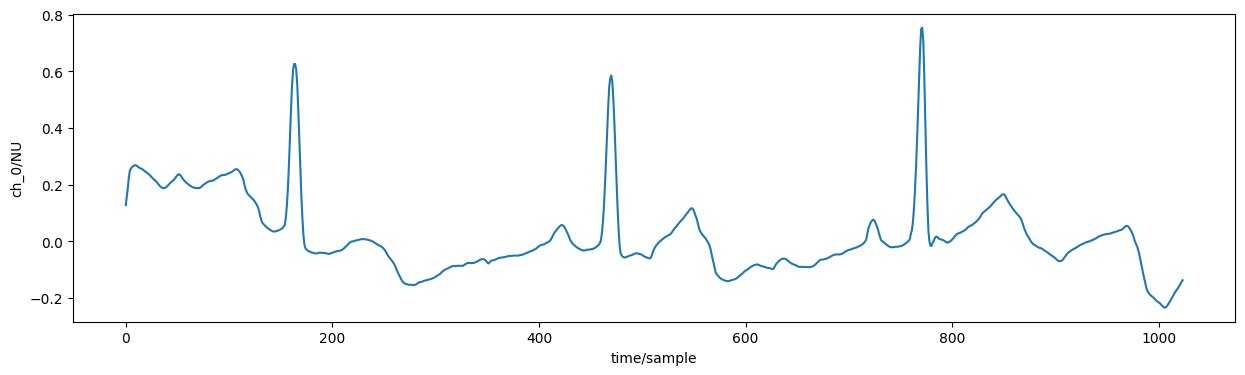

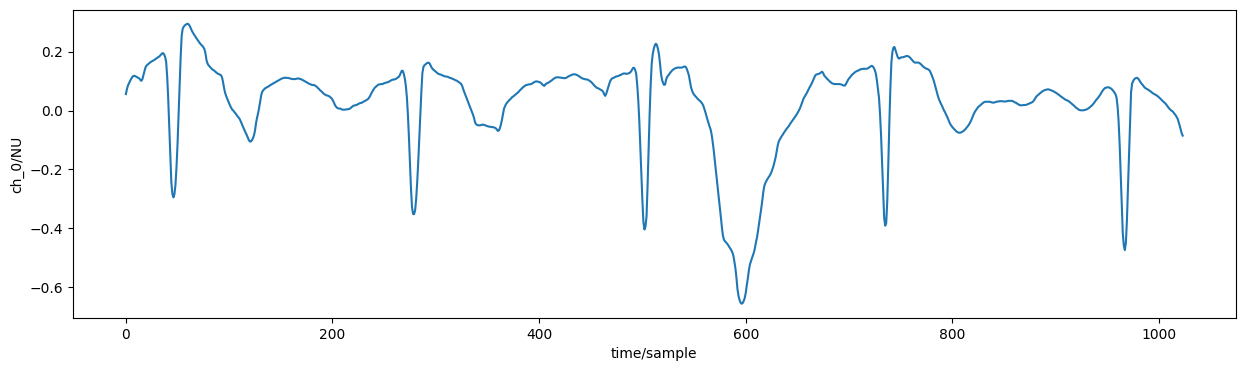

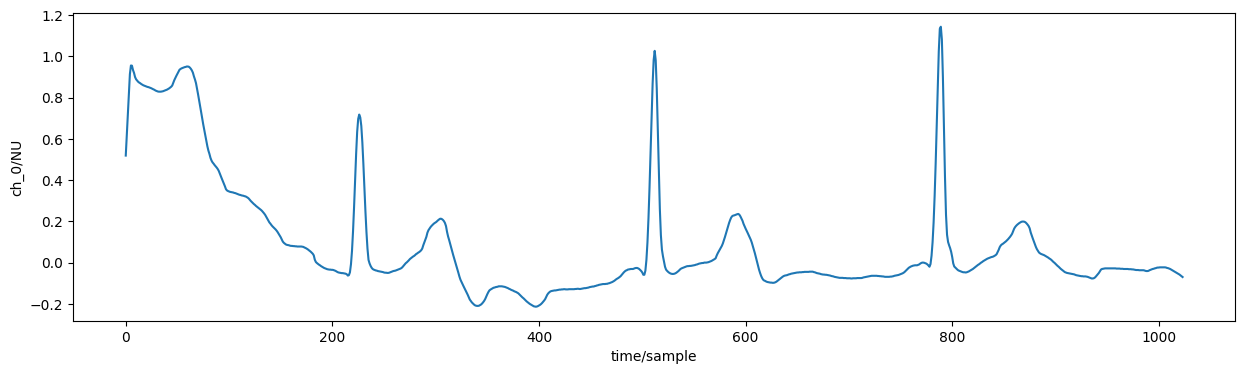

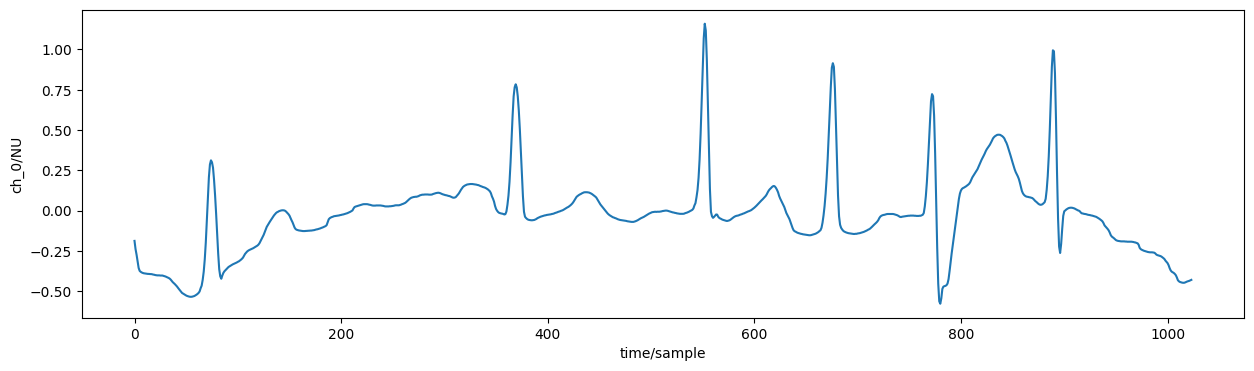

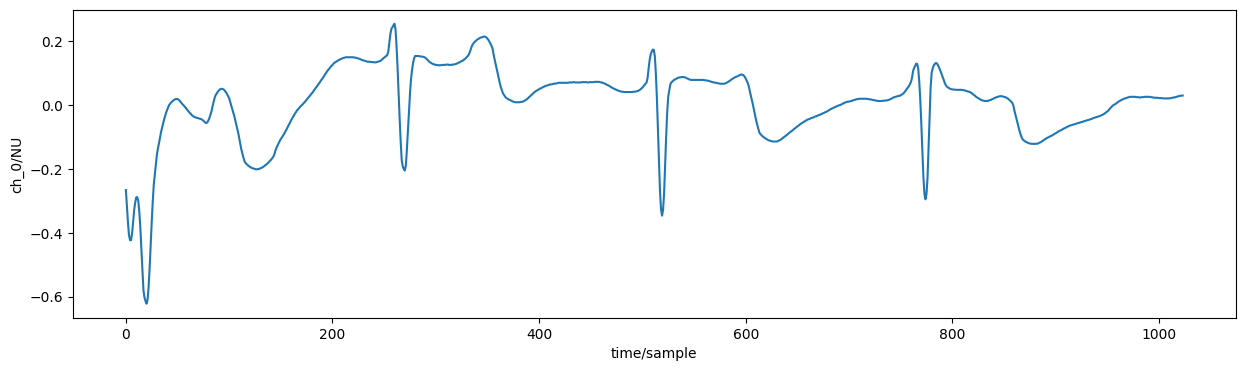

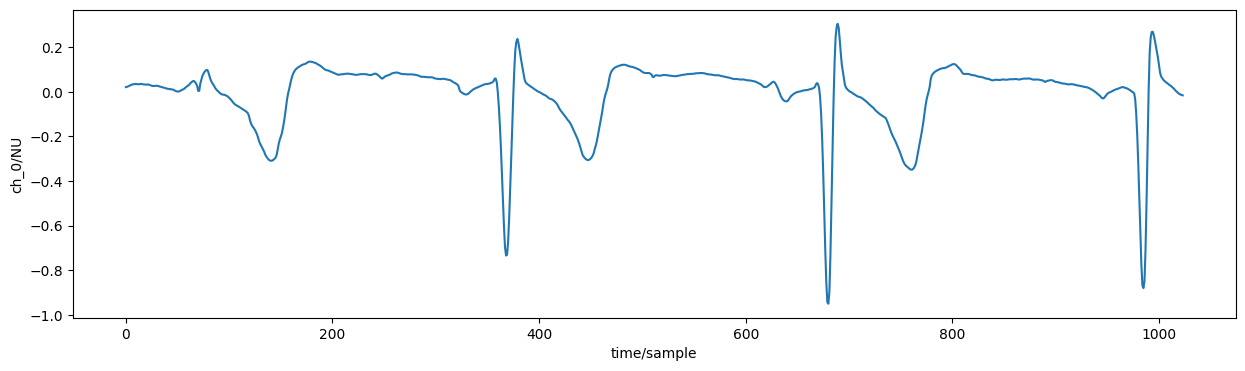

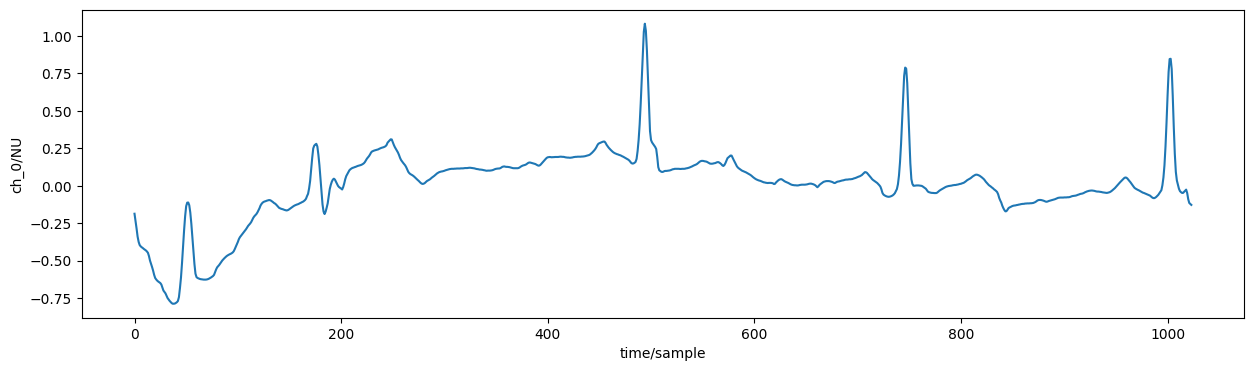

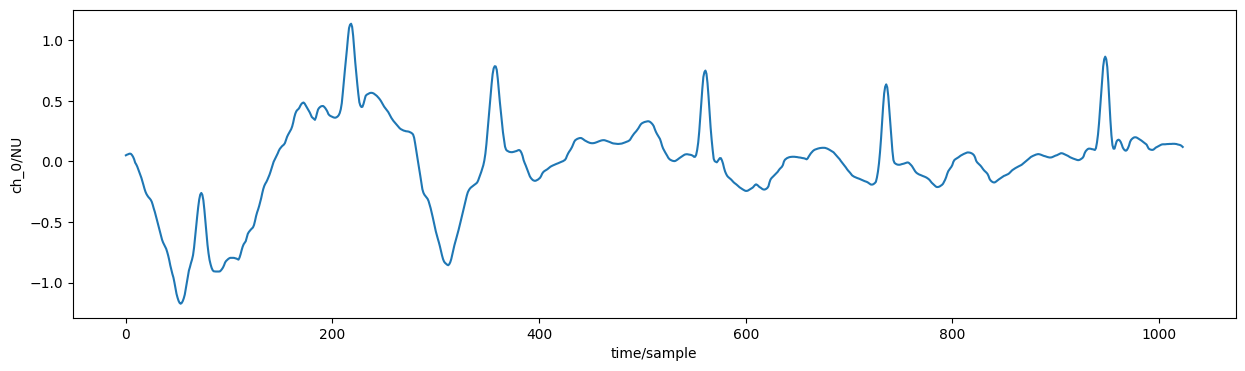

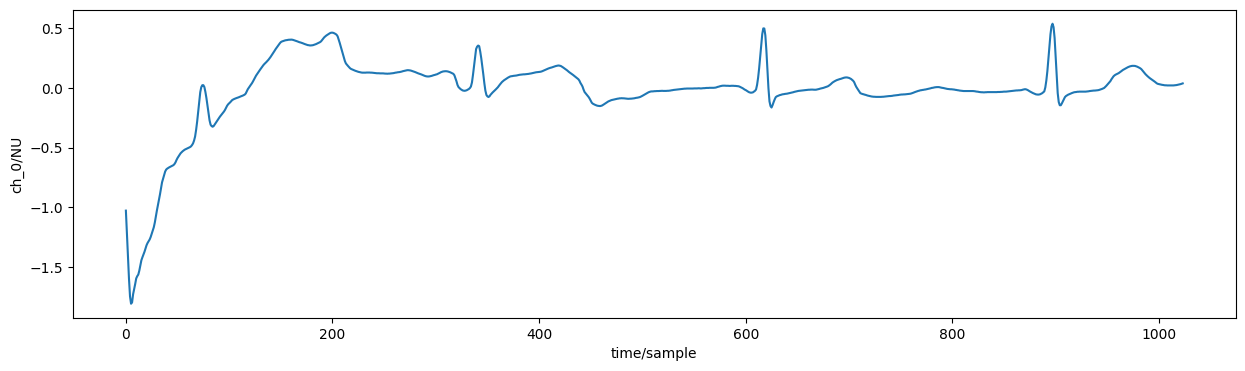

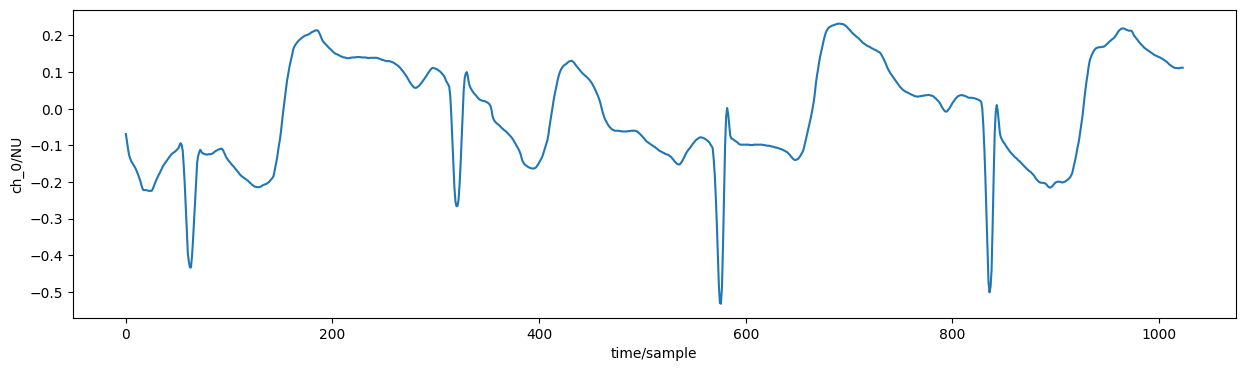

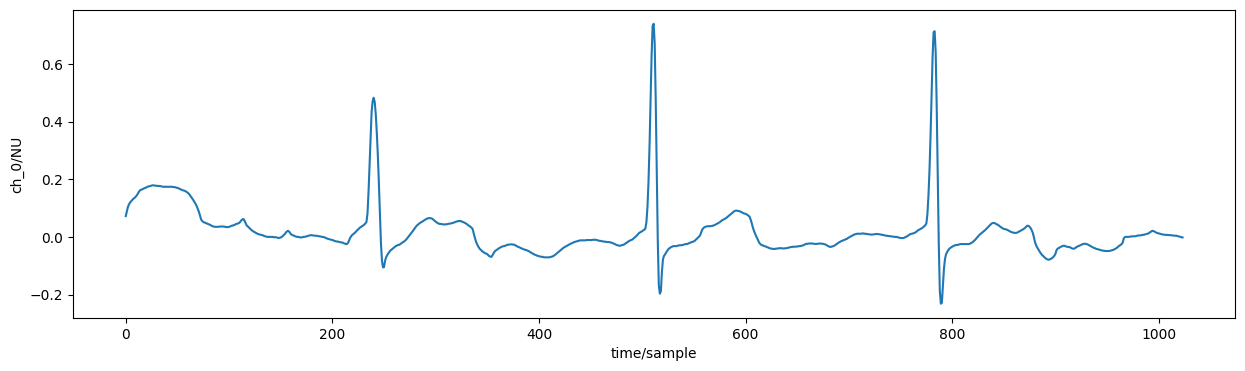

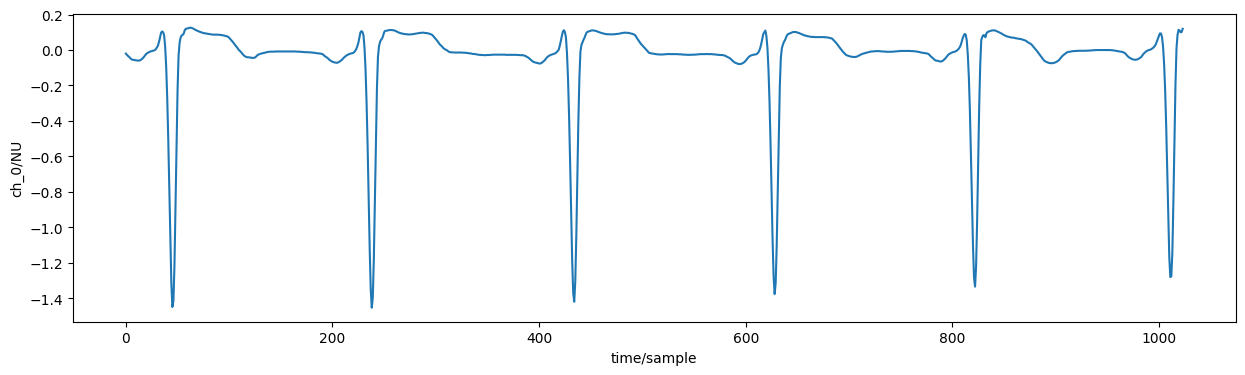

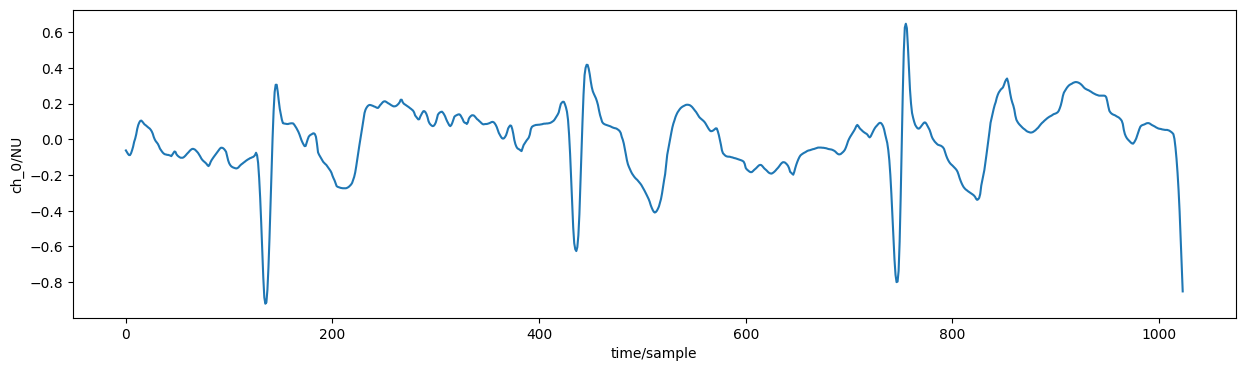

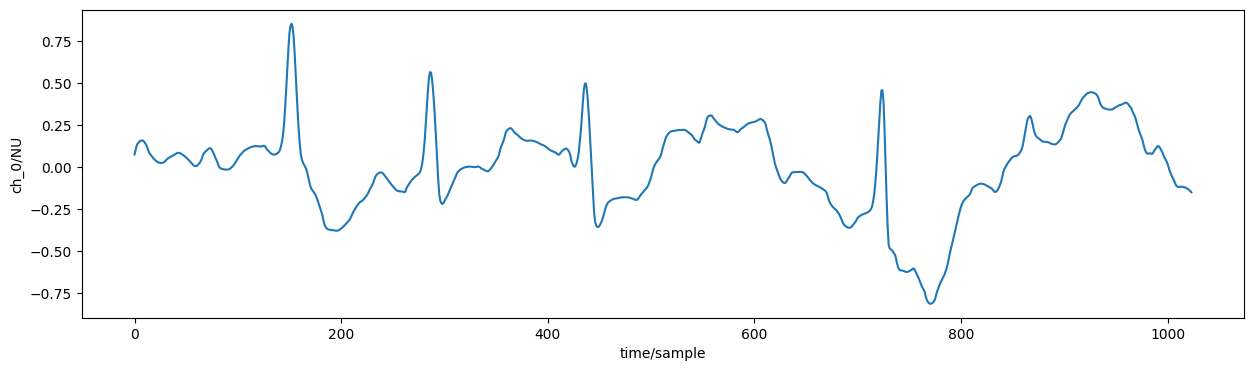

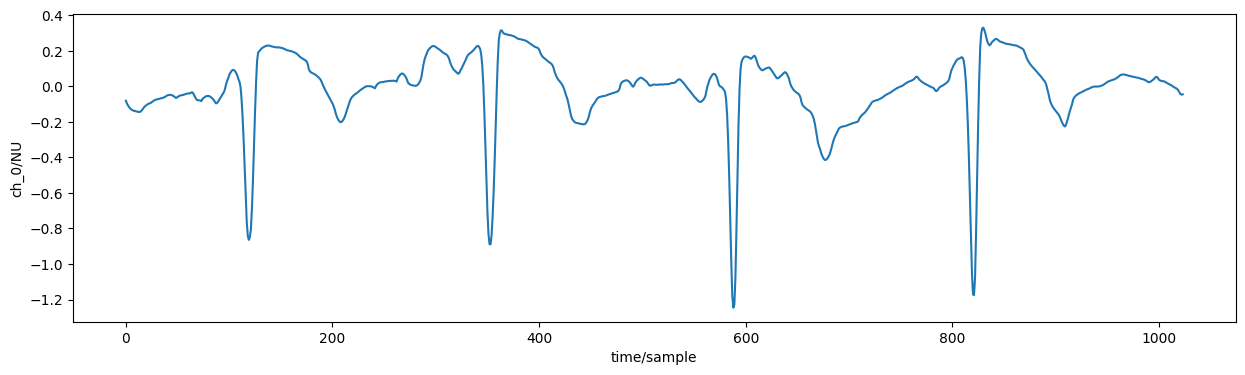

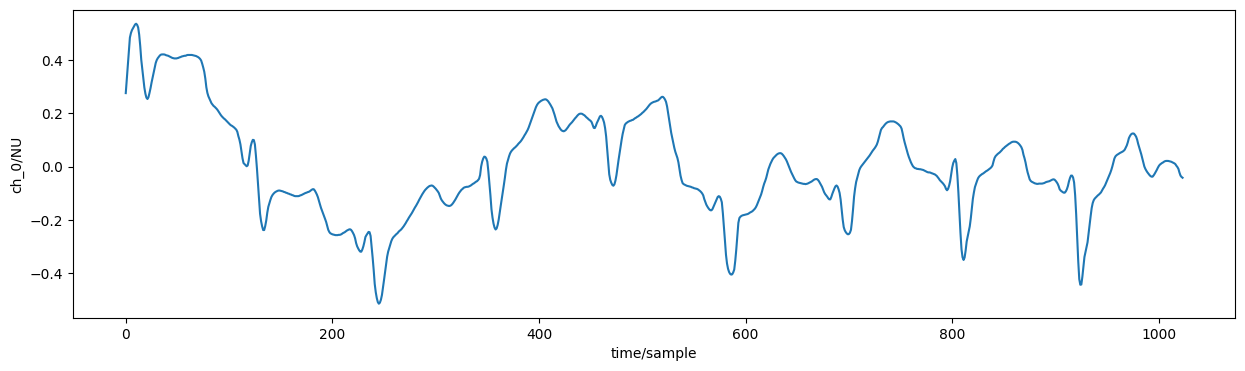

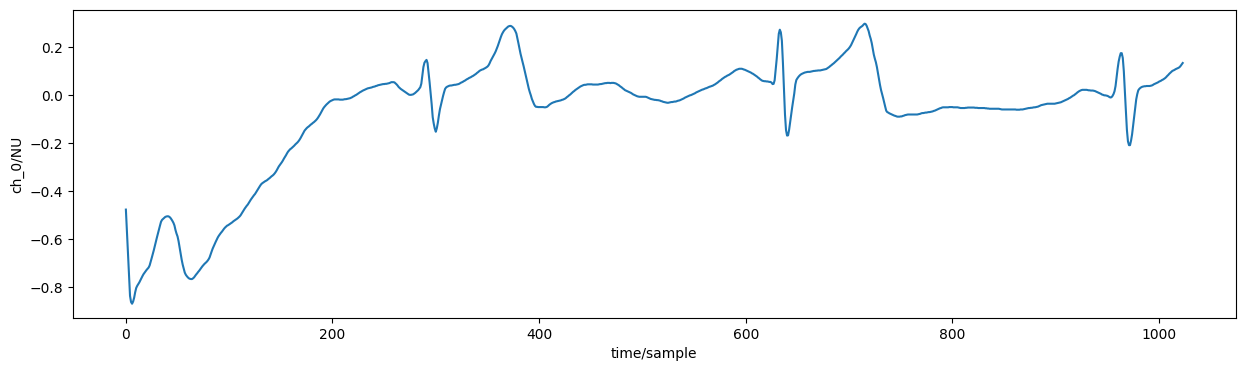

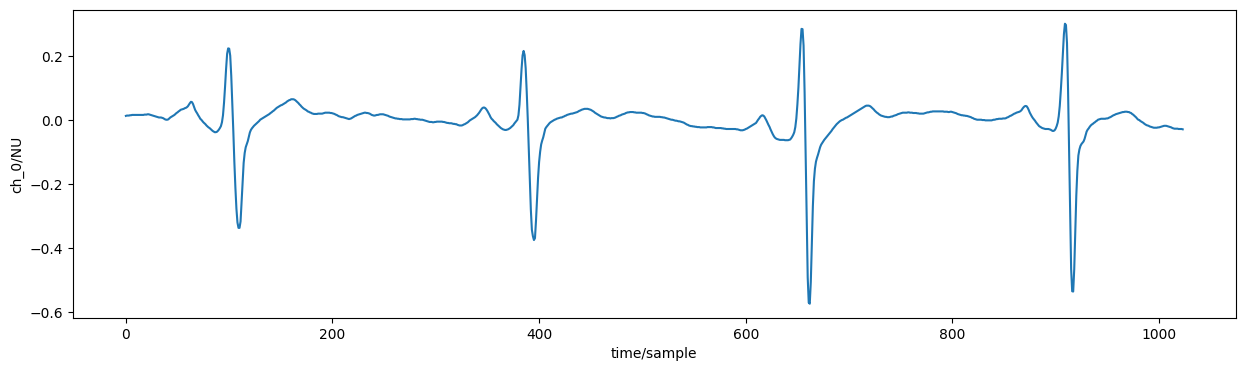

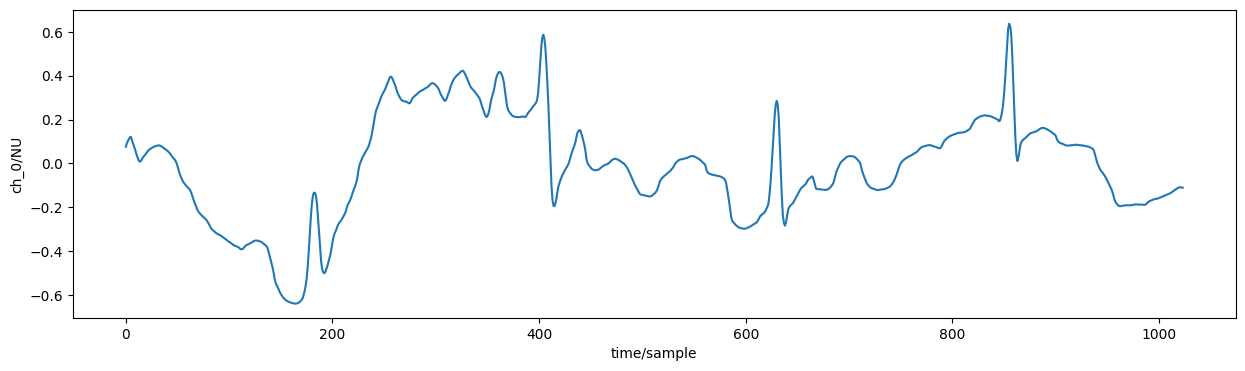

In [23]:
df = pd.read_csv('REFERENCE-v3.csv', names=['filename', 'label'], header=None)
for i, row in df.head(20).iterrows():
  r = wfdb.rdrecord(f'./training2017/{row['filename']}')
  wfdb.plot_items(signal=r.p_signal[:1024, 0],
                    figsize=(15,4),)